<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/L1_and_L2_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

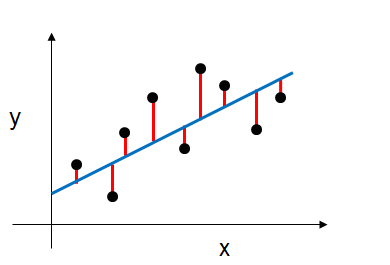

### Recall that for a normal linear regression model of:

$$Y = \beta_0 + \beta_1X_1 + ... + \beta_pX_p$$

### We would estimate its coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS). Or graphically, we're fitting the blue line to our data (the black points) that minimizes the sum of the distances between the points and the blue line (sum of the red lines) as shown above.


### Mathematically, this can be denoted as:

$$RSS = \sum_{i=1}^n \left( y_i - ( \beta_0 + \sum_{j=1}^p \beta_jx_{ij} ) \right)^2$$


where:

- $n$ is the **total number of observations (data)**.
- $y_i$ is the **actual output value of the observation (data)**.
- $p$ is the **total number of features**.
- $\beta_j$ is a **model's coefficient**.
- $x_{ij}$ is the **$i_{th}$ observation, $j_{th}$ feature's value**.
- $\beta_0 + \sum_{j=1}^p \beta_jx_{ij}$ is the **predicted output of each observation**.

#Overfitting
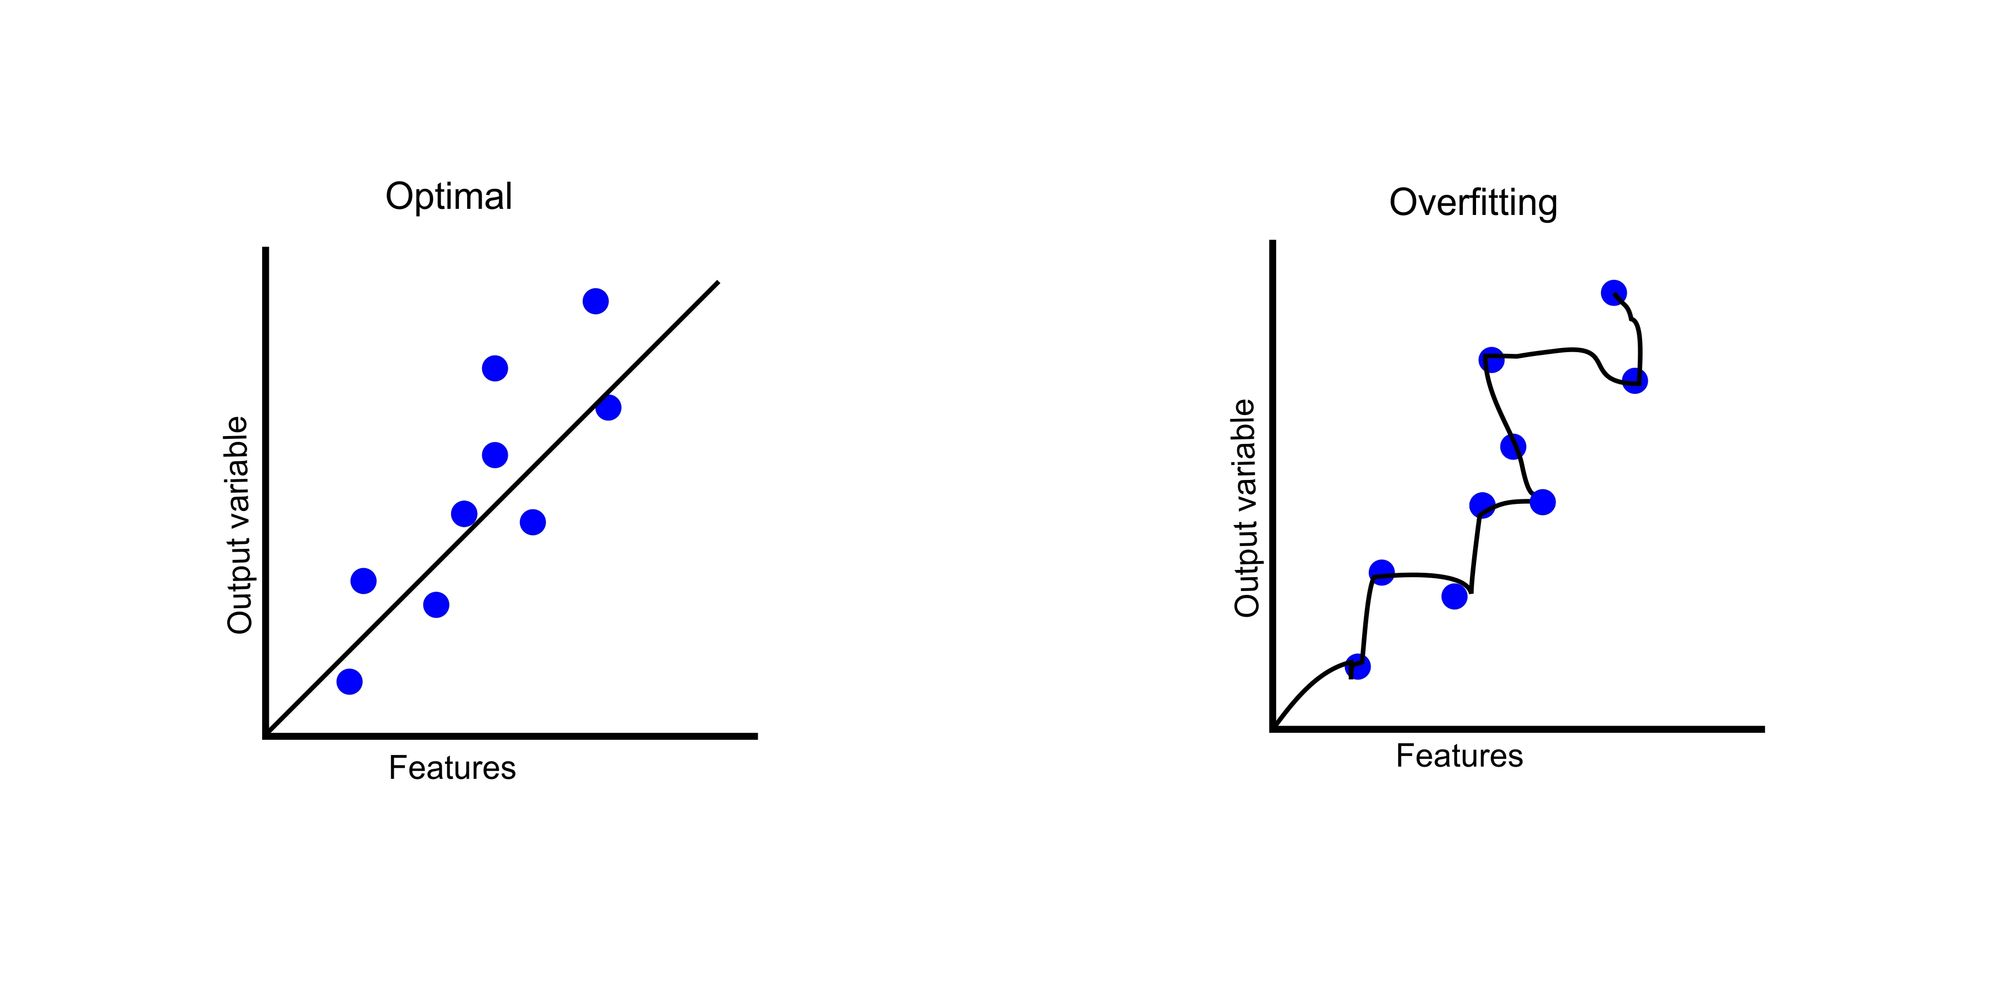

# <b> <u>Ridge and Lasso Regression </b>

### Regularized linear regression models are very similar to least squares, except that the coefficients are estimated by minimizing a slightly different objective function. we **minimize the sum of RSS and a "penalty term"** that penalizes coefficient size.

### **Ridge regression** (or "L2 regularization") minimizes:

$$\text{RSS} + \lambda \sum_{j=1}^p \beta_j^2$$

### **Lasso regression** (or "L1 regularization") minimizes:

$$\text{RSS} + \lambda \sum_{j=1}^p \lvert \beta_j \rvert$$

### Where $\lambda$ is a **tuning parameter** that seeks to balance between the fit of the model to the data and the magnitude of the model's coefficients:

- ### A tiny $\lambda$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
- ### Increasing $\lambda$ penalizes the coefficients and thus shrinks them towards zero.

### <b>Lasso stands for least absolute shrinkage and selection operator</b>

### Thus you can think of it as, we're balancing two things to measure the model's total quality. The RSS, measures how well the model is going to fit the data, and then the magnitude of the coefficients, which can be problematic if they become too big.

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Some Key Details of the dataset

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

In [ ]:
# read dataset
dataset = pd.read_csv('/content/drive/MyDrive/Tech/ML/Datasets/Melbourne_housing_FULL.csv')

In [ ]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
dataset.nunique()

,0
Suburb,351
Address,34009
Rooms,12
Type,3
Price,2871
Method,9
SellerG,388
Date,78
Distance,215
Postcode,211


In [ ]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [ ]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
dataset.shape

(34857, 15)

#### Checking for Nan values

In [ ]:
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


#### Handling Missing values

In [ ]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

**Drop NA values of Price, since it's our predictive variable we won't impute it**

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(27244, 15)

#### Let's one hot encode the categorical features

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# # Iterate through the categorical columns and apply Label Encoding
# for column in ['Suburb', 'Type', 'Method', 'SellerG', 'Regionname', 'CouncilArea']:
#   dataset[column] = le.fit_transform(dataset[column])

In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True) #get_dummies is an API in pandas

In [ ]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


#### Let's bifurcate our dataset into train and test dataset

In [ ]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

#### Let's train our Linear Regression Model on training dataset and check the accuracy on test set

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
y_pred=reg.predict(test_X)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(test_y, y_pred)
print("R-squared:", r2)


R-squared: 0.1385368316165222


In [ ]:
x_pred=reg.predict(train_X)
from sklearn.metrics import r2_score

# Compare predictions on training data (x_pred) with actual values from training data (train_y)
r2 = r2_score(train_y, x_pred)
print("R-squared:", r2)

R-squared: 0.6827792395792723


In [ ]:
reg.score(test_X, test_y)

0.1385368316165222

In [ ]:
reg.score(train_X, train_y)

0.6827792395792723

**Here training score is 68% but test score is 13.85% which is very low**

<h4 style='color:purple'>Normal Regression is clearly overfitting the data, let's try other models</h4>

#### Using Lasso (L1 Regularized) Regression Model

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100)
lasso_reg.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100)

In [ ]:
lasso_reg.score(test_X, test_y)

0.6636111369404489

In [ ]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

#### Using Ridge (L2 Regularized) Regression Model

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(test_X, test_y)

0.6670848945194958

In [ ]:
ridge_reg.score(train_X, train_y)

0.6622376739684328

**We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too**